# CS-333: Applied AI & Machine Learning  
## **Lab 01: Getting Started with Google Colab + Your First ML Model**  

**Program:** BE Mechanical Engineering (VI SEMESTER)  
**Instructor:** Dr. Abbas Hussain  
**Duration:** 3 Hours  
**Tool:** Google Colab  

---

### Learning Outcomes
By the end of this lab, you will be able to:
1. Use Google Colab (run cells, restart runtime, save, share)
2. Work with code cells and markdown cells
3. Load and explore a dataset using Pandas
4. Train a simple ML model using scikit-learn
5. Evaluate the model using accuracy and confusion matrix
6. (Preview) Run a small PyTorch demo

---

### Submission Instructions
- **Rename your notebook as:** `Lab01_RollNo_Name.ipynb`
- **Complete all TODO tasks**
- **Submit:** Colab link (Viewer access) OR upload `.ipynb`


## Part 1 — Google Colab Basics (Warm-up)

✅ **What to do**
- Run a cell: **Shift + Enter**
- Add a markdown cell: **+ Text**
- Add a code cell: **+ Code**
- Restart runtime: **Runtime → Restart runtime**
- Save copy: **File → Save a copy in Drive**
- Download notebook: **File → Download → .ipynb**
- (Optional) GPU: **Runtime → Change runtime type**

### 🧩 TODO (Write in a markdown cell below)
1. Your Name:
2. Roll No:
3. Section:


1. Name: Muhammad Saboor Hassan
2. Roll No: ME-1961
3. Section: A

In [1]:
# Part 2 — Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


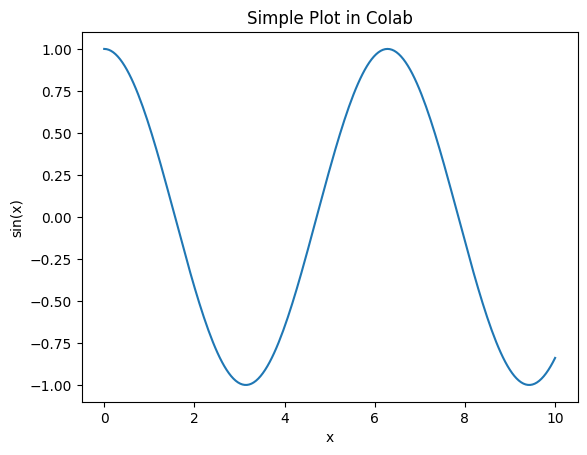

In [11]:
# Part 2 — Python Warm-up (Quick Plot)

x = np.linspace(0, 10, 200)
y = np.cos(x)

plt.plot(x, y)
plt.title("Simple Plot in Colab")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

# 🧩 TODO:
# Change sin(x) to cos(x) and run again.


In [12]:
# Part 3 — Load Dataset (Binary Classification)

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("✅ Dataset loaded!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", data.target_names)


✅ Dataset loaded!
X shape: (569, 30)
y shape: (569,)
Classes: ['malignant' 'benign']


In [4]:
# Part 3 — Convert to DataFrame (Easy Viewing)

df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Part 3 — Basic Exploration

print("Class distribution:")
print(df["target"].value_counts())

print("\nSummary statistics (first 5 features):")
df.describe().iloc[:, :5]


Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Summary statistics (first 5 features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [19]:
# Part 4 — Train/Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

# 🧩 TODO:
# Change test_size to 0.20 and 0.30 and record accuracy later.


Train set: (398, 30) (398,)
Test set : (171, 30) (171,)


In [20]:
# Part 4 — Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling completed!")


✅ Scaling completed!


In [25]:
# Part 4 — Train a Classifier (Logistic Regression)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Part 5 — Predictions

y_pred = model.predict(X_test)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual     :", y_test[:10])


First 10 predictions: [0 1 1 0 1 0 1 0 1 0]
First 10 actual     : [0 1 1 0 0 0 1 0 1 0]


✅ Test Accuracy: 0.9415204678362573

Confusion Matrix:
 [[ 56   8]
 [  2 105]]


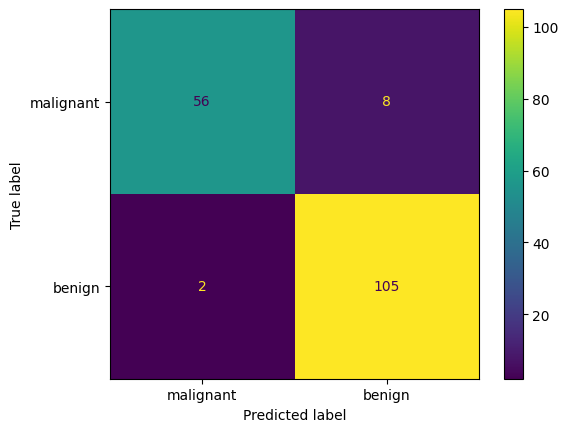


Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.88      0.92        64
      benign       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [28]:
# Part 5 — Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


In [ ]:
# 🧩 Task 3 — Train Without Scaling (Experiment)

# TODO:
# 1) Train Logistic Regression on X_train and X_test (without StandardScaler)
# 2) Compare accuracy with the scaled version
# 3) Write 2 lines explaining why scaling matters

# Write your code below:

# Training classifier without scaling

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

# Predictions without scaling

y_pred = model.predict(X_test)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual     :", y_test[:10])


In [18]:
# Part 6 — PyTorch Preview (Just Familiarity)

import torch

a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([10.0, 20.0, 30.0])

print("a:", a)
print("b:", b)
print("a + b =", a + b)
print("a * b =", a * b)

# 🧩 TODO:
# Try creating a 2x2 matrix tensor and print it.


a: tensor([1., 2., 3.])
b: tensor([10., 20., 30.])
a + b = tensor([11., 22., 33.])
a * b = tensor([10., 40., 90.])


## ✅ Student Tasks (To Submit)

### Task 1 — Train/Test Split Experiment
Change `test_size` to **0.20** and **0.30** and record accuracy:

| Test Size | Accuracy |
|----------|----------|
| 0.20     |    0.982      |
| 0.25     |  0.986        |
| 0.30     |     0.988     |

### Task 2 — Without Scaling
Train Logistic Regression **without StandardScaler** and compare accuracy.

Observation: For a test size of 0.30, the accuracy with scaling was 0.988 and without scaling is 0.9415.

Hence, we can conclude that scaling matters because it ensures that features with large magnitudes do not disproportionately influence the learning process, ultimately improving model accuracy, stablity, and convergence speed.

### Task 3 — Mechanical Engineering Reflection (3–4 lines)
How can **classification** be used in Mechanical Engineering?

Classification in mechanical engineering can be used to categorize components, materials, and processes, enabling automated fault detection, optimized design retrieval, and predictive maintenance. We can utilize algorithms to analyze sensor data or 3D models to identify, classify, and streamline production stages.


---

